In [1]:
from sklearn.datasets.samples_generator import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

C:\Anaconda3\envs\nlpiaenv\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# prepare the dataset
def prepare_data():
    
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

    # one hot encode output variable
    y = to_categorical(y)

    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, testX, trainy, testy

In [3]:
# define and fit the base model
def get_base_model(trainX, trainy):
    
    # define model
    model = Sequential()
    model.add(Dense(10, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # fit model
    model.fit(trainX, trainy, epochs=100, verbose=0)
    return model

In [4]:
# evaluate a fit model
def evaluate_model(model, trainX, testX, trainy, testy):
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return train_acc, test_acc

In [5]:
# add one new layer and re-train only the new layer
def add_layer(model, trainX, trainy):
    
    # remember the current output layer
    output_layer = model.layers[-1]

    # remove the output layer
    model.pop()

    # mark all remaining layers as non-trainable
    for layer in model.layers:
        layer.trainable = False
        
    # add a new hidden layer
    model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
    
    # re-add the output layer
    model.add(output_layer)

    # fit model
    model.fit(trainX, trainy, epochs=100, verbose=0)

In [6]:
# prepare data
trainX, testX, trainy, testy = prepare_data()

In [7]:
# get the base model
model = get_base_model(trainX, trainy)

In [8]:
# evaluate the base model
scores = dict()


train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)

print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))


scores[len(model.layers)] = (train_acc, test_acc)

> layers=2, train=0.832, test=0.820


In [9]:
# add layers and evaluate the updated model
n_layers = 10


for i in range(n_layers):
    # add layer
    add_layer(model, trainX, trainy)

    # evaluate model
    train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))

    # store scores for plotting
    scores[len(model.layers)] = (train_acc, test_acc)

> layers=3, train=0.838, test=0.830
> layers=4, train=0.836, test=0.824
> layers=5, train=0.832, test=0.822
> layers=6, train=0.832, test=0.824
> layers=7, train=0.830, test=0.824
> layers=8, train=0.818, test=0.826
> layers=9, train=0.844, test=0.826
> layers=10, train=0.826, test=0.822
> layers=11, train=0.832, test=0.824
> layers=12, train=0.836, test=0.822


In [11]:
scores

{2: (0.8320000171661377, 0.8199999928474426),
 3: (0.8379999995231628, 0.8299999833106995),
 4: (0.8360000252723694, 0.8240000009536743),
 5: (0.8320000171661377, 0.8220000267028809),
 6: (0.8320000171661377, 0.8240000009536743),
 7: (0.8299999833106995, 0.8240000009536743),
 8: (0.8180000185966492, 0.8259999752044678),
 9: (0.843999981880188, 0.8259999752044678),
 10: (0.8259999752044678, 0.8220000267028809),
 11: (0.8320000171661377, 0.8240000009536743),
 12: (0.8360000252723694, 0.8220000267028809)}

In [ ]:
# In this case, we can see that the baseline model does reasonably well on this problem. As the
# layers are increased, we can roughly see an increase in accuracy for the model on the training
# dataset, likely as it is beginning to overfit the data. We see a rough drop in classification
# accuracy on the test dataset, likely because of the overfitting.

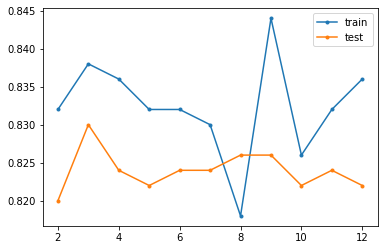

In [10]:
# plot number of added layers vs accuracy
pyplot.plot(scores.keys(), [scores[k][0] for k in scores.keys()], label='train', marker='.')
pyplot.plot(scores.keys(), [scores[k][1] for k in scores.keys()], label='test', marker='.')
pyplot.legend()
pyplot.show()

In [ ]:
# In this case, the plot suggests a slight overfitting of the training dataset